In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/RSCCASN.csv',index_col='DATE',parse_dates=True)

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
df.columns = ['Sales']

In [5]:
df.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


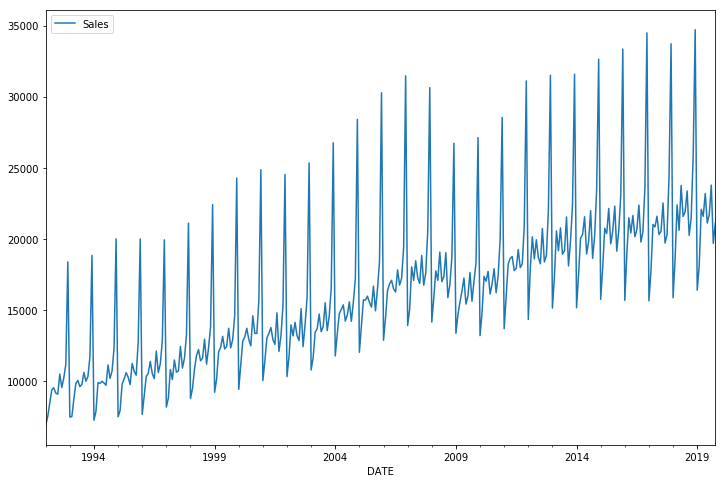

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

334

In [8]:
len(df)-18

316

In [9]:
test_size = 18
test_ind = len(df) - test_size

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
1992-06-01,9182
1992-07-01,9103
1992-08-01,10513
1992-09-01,9573


In [12]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

C:\Users\Rohan\Anaconda3\Anaconda5\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [18]:
X,y = generator[0]

In [19]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [20]:
y

array([[0.02047633]])

In [21]:
n_features = 1

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [54]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [55]:
model.fit(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 2/20
304/304 [==============================] - 6s 19ms/step - loss: 0.0021 - val_loss: 5.0257e-04
Epoch 3/20
304/304 [==============================] - 5s 17ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 4/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0021 - val_loss: 4.0950e-04
Epoch 5/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0016 - val_loss: 7.9876e-04
Epoch 6/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0012 - val_loss: 5.3295e-04
Epoch 7/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0011 - val_loss: 2.1448e-04
Epoch 8/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0013 - val_loss: 2.8447e-04
Epoch 9/20
304/304 [==============================] - 3s 11ms/step - loss: 0

In [56]:
losses = pd.DataFrame(model.history.history)

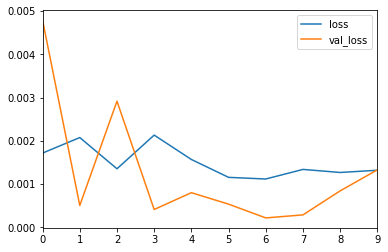

In [57]:
losses.plot()

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [59]:
true_predictions = scaler.inverse_transform(test_predictions)

In [60]:
test['Predictions'] = true_predictions

C:\Users\Rohan\Anaconda3\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22167.414608
2018-06-01,21589,20736.532327
2018-07-01,21919,20985.094970
2018-08-01,23381,23286.848641
2018-09-01,20260,20139.604218
2018-10-01,21473,20801.550566
2018-11-01,25831,25824.745114
2018-12-01,34706,38552.069824
2019-01-01,16410,15771.252163


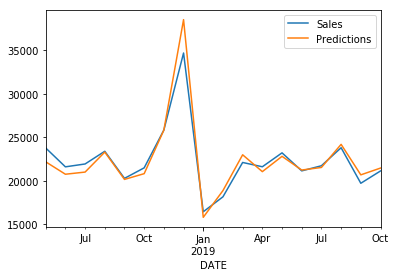

In [62]:
test.plot()

In [63]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

C:\Users\Rohan\Anaconda3\Anaconda5\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [65]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [68]:
model.fit(generator,epochs=7)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/7
322/322 [==============================] - 2s 6ms/step - loss: 0.0014
Epoch 2/7
322/322 [==============================] - 2s 6ms/step - loss: 9.5606e-04
Epoch 3/7
322/322 [==============================] - 2s 5ms/step - loss: 0.0012
Epoch 4/7
322/322 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 5/7
322/322 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 6/7
322/322 [==============================] - 2s 5ms/step - loss: 9.5801e-04
Epoch 7/7
322/322 [==============================] - 2s 5ms/step - loss: 0.0011


In [69]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [70]:
forecast = scaler.inverse_transform(forecast)

In [71]:
forecast

array([[26027.76560259],
       [35344.35891533],
       [16415.92319298],
       [18648.55425024],
       [21901.96820498],
       [21625.3037219 ],
       [23106.43505526],
       [21242.0781498 ],
       [21737.90481043],
       [23621.26169252],
       [19953.67517185],
       [21224.25202465]])

In [72]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [73]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])
forecast_df

,Forecast
2019-11-01,26027.765603
2019-12-01,35344.358915
2020-01-01,16415.923193
2020-02-01,18648.554250
2020-03-01,21901.968205
2020-04-01,21625.303722
2020-05-01,23106.435055
2020-06-01,21242.078150
2020-07-01,21737.904810
2020-08-01,23621.261693


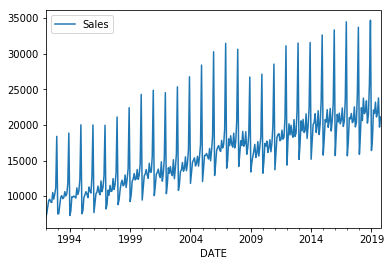

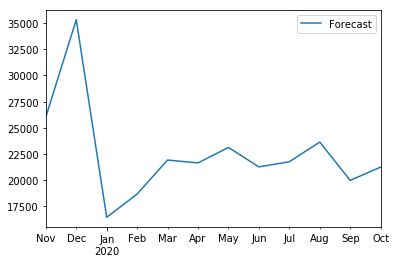

In [74]:
df.plot()
forecast_df.plot()

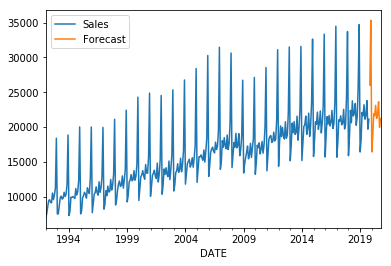

In [75]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576, 611)

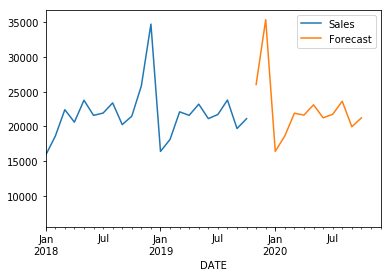

In [76]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')